In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#CO2df contains all 7190 sorbents with CO2 
#mmolgdf contains CO2 capacities in mmol/g 3840 sorbents
mmolgdf=pd.read_csv('./CO2capmmolg.csv')
CO2df=pd.read_csv('./CO2df.csv')

In [3]:
#5269 datapoints 3840 with mmol/g unit or 73% of data 
CO2df[CO2df['temp_C']>0]['ads_units'].shape
CO2df["ads_units"].value_counts()

mmol/g                        3840
cm3(STP)/g                    1506
molecules/unitcell             350
mg/g                           293
wt%                            272
Multicomponent                 228
mmol/cm3                       130
cm3(STP)/cm3                   129
ml/g                            91
kg/mol                          49
mol/mol                         42
mol/l                           39
mol/g                           36
micromoles/m2                   35
g/l                             19
mol/m3                          16
g/g                             12
kmol/m3                          9
molecules/8 unit cells           9
g/cm3                            9
mg/m2                            8
mmol/kg                          8
molecules/cage                   6
molecules/formula unit           6
cm3/m2                           5
molecules/Cu2 unit               3
volume/volume                    3
molecules/Rh2 unit               3
molecules/pore      

In [50]:
#tempdfcontains mmolgdf values greater than 0C and 0 capacity 
#contains no null values and contains 2850 values
#empdf['CO2_capacity (mmol/g)'].isnull().sum()
tempdf=mmolgdf[(mmolgdf['temp_C']>-30) & (mmolgdf['CO2_capacity (mmol/g)']>0.01)].sort_values(by='CO2_capacity (mmol/g)', ascending=False).round(3)


In [51]:
#columns have incorrect capacity
tempdf=tempdf.drop(2232).drop(532).drop(2957).drop(2958).drop(3089).drop(2956).drop(904).drop(3387).drop(3389).drop(3388)
#mg-mof-74 goes by numerous names
sorblist=tempdf.replace('CPO-27-Mg','Mg-MOF-74').replace('Mg2(dobdc)','Mg-MOF-74').replace('Mg-MOF-74 (3)'  ,'Mg-MOF-74')


In [53]:
#Sorblist with Temp >-30 and >0.01 mmol/g
sorblist
sorblist[(sorblist['adsorbent']=='NBOFFIVE-1-Ni')]

,Unnamed: 0,DOI,isotherm_file,temp_C,adsorbent,CO2_capacity (mmol/g)


In [46]:
#Top occuring sorbents with >=0.7 filter
sorbcount=pd.DataFrame(tempdf['adsorbent'].value_counts()).iloc[0:15]
sorbcount.rename(columns={"adsorbent": "occurences"})

,occurences
CuBTC,147
Mg-MOF-74,95
IRMOF-1,89
Carbon,87
ZIF-8,71
Zeolite 13X,65
Zeolite 5A,52
UiO-66,37
MIL-101,37
MIL-53(Al),36


In [48]:
#Top sorbents period
Tsorb=pd.DataFrame(tempdf[tempdf['CO2_capacity (mmol/g)']>=0.7]['adsorbent'].value_counts())
Tsorb=Tsorb.rename(columns={"adsorbent": "occurences"})
Tsorb

,occurences
Mg-MOF-74,62
Zeolite 13X,32
Zeolite 5A,17
PEI-25-APTES-25-PQCS2129,14
Ni-DOBDC,11
...,...
L-DNL-6,1
Sr-Rho-ZMOF,1
CID-6,1
Na-A,1


In [10]:
#tempdf=tempdf[tempdf['CO2_capacity (mmol/g)']>=0.8].drop(tempdf.columns[0],axis=1)
#tempdf.to_csv(r'./final.csv', index=False)
tempdf[tempdf['temp_C']>100].head()

,Unnamed: 0,DOI,isotherm_file,temp_C,adsorbent,CO2_capacity (mmol/g)
270,692,10.1007/s10450-013-9595-3,10.1007s10450-013-9595-3.isotherm24.json,300,Carbon,0.433
268,690,10.1007/s10450-013-9595-3,10.1007s10450-013-9595-3.isotherm22.json,300,Carbon,0.429
2066,3713,10.1021/Je800900a,10.1021Je800900a.Isotherm37.json,125,Zeolite 13X,0.421
269,691,10.1007/s10450-013-9595-3,10.1007s10450-013-9595-3.isotherm23.json,300,Carbon,0.411
2978,5452,10.1039/c1ee01720a,10.1039c1ee01720a.isotherm40.json,110,Mg-MOF-74,0.410


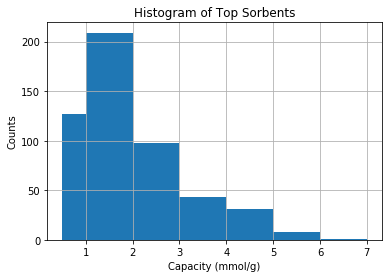

In [11]:
tempdf[tempdf['CO2_capacity (mmol/g)']>=0.7]['CO2_capacity (mmol/g)'].hist(bins=[0.5, 1, 2, 3, 4, 5, 6,7])
plt.xlabel('Capacity (mmol/g)')
plt.ylabel('Counts')
plt.title('Histogram of Top Sorbents')
#plt.xticks(np.arange(0.5, 7, .5))
plt.rcParams.update({'font.size': 13})

In [67]:
arf

,Unnamed: 0,DOI,isotherm_file,temp_C,adsorbent,CO2_capacity (mmol/g)
830,1494,10.1016/j.jcis.2010.09.065,10.1016j.jcis.2010.09.065.isotherm2b.json,5,Mg-MOF-74,6.296
829,1493,10.1016/j.jcis.2010.09.065,10.1016j.jcis.2010.09.065.isotherm2a.json,5,Mg-MOF-74,5.901
3384,6217,10.1039/C3sc51319j,10.1039C3sc51319j.isotherm7.json,5,CPO-27-Mg,5.777
2536,4658,10.1021/Jz3008485,10.1021Jz3008485.Isotherm6.json,25,CuBTC,5.731
2784,5023,10.1021/la991011c,10.1021la991011c.Isotherm99.json,0,T3A Carbon Molecular Sieve,5.590
...,...,...,...,...,...,...
581,1127,10.1016/j.ces.2015.06.064,10.1016j.ces.2015.06.064.Isotherm1.json,50,CPO-27-Ni,0.706
1793,3237,10.1021/ie5046044,10.1021ie5046044.Isotherm5.json,25,TBA-Activated at 120C,0.706
183,499,10.1002/cssc.201200907,10.1002cssc.201200907.isotherm4.json,25,L-DNL-6,0.705
1368,2430,10.1021/acs.jpcc.5b03700,10.1021acs.jpcc.5b03700.Isotherm16.json,25,Mn-MOF-74,0.703


In [88]:
arf=tempdf[tempdf['CO2_capacity (mmol/g)']>=0.7]
arf[(arf['adsorbent']=='Cu-TDPAT') & (arf['temp_C']==25)]#['CO2_capacity (mmol/g)']

,Unnamed: 0,DOI,isotherm_file,temp_C,adsorbent,CO2_capacity (mmol/g)
2195,4092,10.1021/jp3046356,10.1021jp3046356.Isotherm61.json,25,Cu-TDPAT,0.954
2191,4088,10.1021/Jp3046356,10.1021Jp3046356.Isotherm5.json,25,Cu-TDPAT,0.770
2193,4090,10.1021/Jp3046356,10.1021Jp3046356.Isotherm6.json,25,Cu-TDPAT,0.746


In [12]:
tempdf[tempdf['CO2_capacity (mmol/g)']>=0.7]['CO2_capacity (mmol/g)'].shape

(517,)